Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [2]:
df = pd.read_csv('/content/dataset_1.csv')

Exploratory data analysis

In [3]:
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11


In [4]:
df.shape

(336, 7)

In [5]:
df.columns

Index(['Date', 'Time (Local)', 'Eyeballs ', 'Zeroes ', 'Completed Trips ',
       'Requests ', 'Unique Drivers'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              15 non-null     object
 1   Time (Local)      336 non-null    int64 
 2   Eyeballs          336 non-null    int64 
 3   Zeroes            336 non-null    int64 
 4   Completed Trips   336 non-null    int64 
 5   Requests          336 non-null    int64 
 6   Unique Drivers    336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


In [7]:
df.isnull().sum()

,0
Date,321
Time (Local),0
Eyeballs,0
Zeroes,0
Completed Trips,0
Requests,0
Unique Drivers,0


In [8]:
df.describe()

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
count,336.00000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,11.50000,19.901786,4.252976,4.062500,5.529762,7.895833
std,6.93251,16.902862,5.795391,5.672581,7.399416,5.884296
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.75000,9.000000,1.000000,0.000000,1.000000,3.000000
50%,11.50000,17.000000,3.000000,2.000000,3.000000,8.000000
75%,17.25000,25.000000,5.000000,5.000000,6.250000,11.000000
max,23.00000,99.000000,59.000000,36.000000,46.000000,30.000000


Filling the null values in date column using forward fill method

In [9]:
df = df.fillna(method='ffill')
df

<ipython-input-9-0db3e03836a4>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11
...,...,...,...,...,...,...,...
331,24-Sep-12,2,3,3,0,2,0
332,24-Sep-12,3,3,3,0,1,0
333,24-Sep-12,4,1,1,0,0,0
334,24-Sep-12,5,4,2,1,1,3


In [10]:
df.columns = df.columns.str.strip()

**Q1. Which date had the most completed trips during the two week period?**

In [11]:
df_agg_date = df.groupby('Date').sum().reset_index()
df_agg_date.nlargest(1,'Completed Trips')

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
12,22-Sep-12,276,960,219,248,344,292


**Q2: What was the highest number of completed trips within a 24 hour period?**

In [12]:
#converting individual date an dtime columns into timestamp suitable for time series analysis
def create_timestamp(date,time):
  return pd.to_datetime(f'{date} {time}:00')

df['Timestamp'] = df.apply(lambda row: create_timestamp(row['Date'],row['Time (Local)']),axis=1)

In [13]:
numeric_col = ['Eyeballs', 'Zeroes', 'Completed Trips', 'Requests', 'Unique Drivers']

In [14]:
#creating rolling window for 24 hr summation
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=24)
df_agg_24hrs = df.set_index('Timestamp')[numeric_col].rolling(window=indexer, min_periods=1).sum()
df_agg_24hrs.nlargest(1,'Completed Trips')

,Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
Timestamp,,,,,
2012-09-21 17:00:00,1015.0,207.0,278.0,367.0,349.0


**Q3: Which hour of the day had the most requests during the two week period?**

In [15]:
df.columns

Index(['Date', 'Time (Local)', 'Eyeballs', 'Zeroes', 'Completed Trips',
       'Requests', 'Unique Drivers', 'Timestamp'],
      dtype='object')

In [16]:
n_col = ['Eyeballs', 'Zeroes', 'Completed Trips','Requests', 'Unique Drivers']
df_agg_time = df.groupby('Time (Local)')[n_col].sum().reset_index()
df_agg_time.nlargest(1,'Requests')

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
23,23,488,193,126,184,119


**Q4: What percentages of all zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)? Tip: The local time value is the start of the hour (e.g. 15 is the hour from 3:00pm - 4:00pm)**

In [17]:
#Calculate all zeroes
total_0 = df['Zeroes'].sum()
total_0

1429

In [18]:
#Idntify day of the week using Pandas
df['Day'] = pd.to_datetime(df['Date']).dt.dayofweek

<ipython-input-18-91a635be069b>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Day'] = pd.to_datetime(df['Date']).dt.dayofweek


In [19]:
#Filter 0's that happened on weekend
weekend_0 = df[
    ((df['Day']==4) & (df['Time (Local)'] >= 17)) |   #Friday5pm
    (df['Day']==5) |
    ((df['Day']==6) & (df['Time (Local)'] < 3))   #Sunday3am
]['Zeroes'].sum()
weekend_0

641

In [20]:
#Calculate the total percentage of 0
percentage_of_all_0s = weekend_0/total_0 * 100
percentage_of_all_0s

44.856543037088876

**Q5: What is the weighted average ratio of completed trips per driver during the two week period? Tip: "Weighted average" means your answer should account for the total trip volume in each hour to determine the most accurate number in whole period.**

In [21]:
df['completed_trip_per_driver'] = df['Completed Trips']/df['Unique Drivers']

In [22]:
#Removing rows where unique driver is 0 as the result will be Nan
without_0 = df[df['Unique Drivers'] > 0]

In [23]:
#Calculating the weighted average
weighted_avg_ratio = np.average(
    without_0['completed_trip_per_driver'], weights = without_0['Completed Trips']
)
weighted_avg_ratio

0.8282775715092395

**Q6: In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts in every 8 hours. Assume that a driver will work same shift each day.**

In [25]:
#convert timestamp column to index
df_agg_8 = df.set_index('Timestamp')

In [27]:
#Resample into 8hr and sum it
df_agg_8 = df_agg_8.resample('8h').sum()

In [28]:
#creating a readable time interval column
time_format = '%Y/%m/%d %h:%m'

In [31]:
df_agg_8['Time interval'] = df_agg_8.index.strftime(time_format) + '-' + (df_agg_8.index+pd.Timedelta('8 hours')).strftime(time_format)
df_agg_8.nlargest(1,'Requests')['Time interval']

,Time interval
Timestamp,
2012-09-21 16:00:00,2012/09/21 Sep:09-2012/09/22 Sep:09


**Q7 : True or False: Driver supply always increases when demand increases during the two week period. Tip: Visualize the data to confirm your answer if needed.**

In [37]:
#creating empty dataframe with timestamp
d_df = pd.DataFrame(df['Timestamp'])

In [38]:
#calculate changes in demand
d_df['req_df'] = df['Requests'].shift(-1)-df['Requests']

In [39]:
#calculating changes in driver supply
d_df['supply_diff'] = df['Unique Drivers'].shift(-1)-df['Unique Drivers']

In [40]:
#Checking the increase/decrease in demnd and driver supply
(d_df[d_df['req_df'] > 0] ['supply_diff'] > 0).all().item()

False

There were times when demand increased, but driver supply did NOT increase

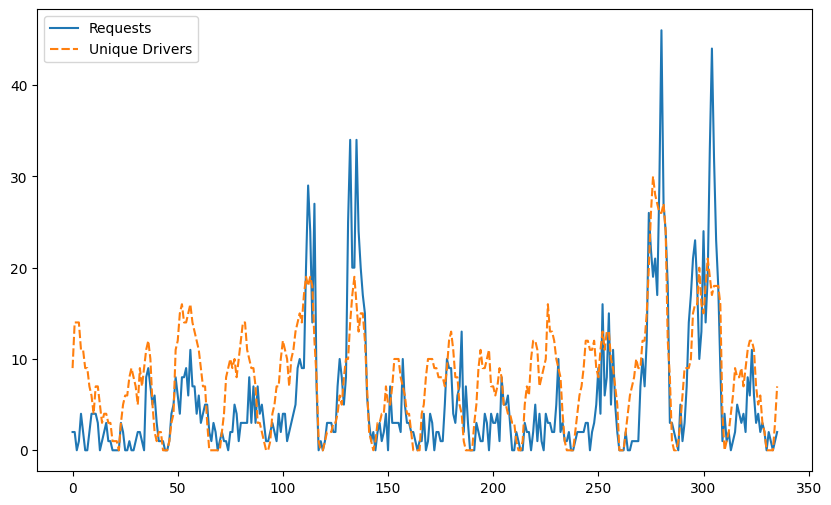

In [43]:
#Visualizing the results
plt.figure(figsize=(10,6))
sns.lineplot(data=df[['Requests','Unique Drivers','Timestamp']])
plt.show()

The graph shows that not all times the demand of Requests and drivers aligned.

**Q8 : In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?**

In [44]:
#create rolling window for 72hr
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=72)
df_agg_72hrs = df.set_index('Timestamp')[numeric_col].rolling(window=indexer, min_periods=1).sum().reset_index()

In [45]:
#Compute zeroes to eyeballs ratio
df_agg_72hrs['zero_eye_ratio'] = df_agg_72hrs['Zeroes']/df_agg_72hrs['Eyeballs']

In [47]:
#removing last 3days to avoid partial data
df_agg_72hrs = df_agg_72hrs[df_agg_72hrs['Timestamp'] <= (df_agg_72hrs['Timestamp'].max()-pd.Timedelta(days=3))]

In [54]:
#ensuring time column is in date time format
df_agg_72hrs['Timestamp'] = pd.to_datetime(df_agg_72hrs['Timestamp'])

In [58]:
#creating readable time interval column
time_format = '%Y/%m/%d %H:%M'
df_agg_72hrs['Time interval'] = df_agg_72hrs['Timestamp'].dt.strftime(time_format) + '-' + \
                                (df_agg_72hrs['Timestamp'] + pd.Timedelta('72 hours')).dt.strftime(time_format)

In [60]:
# Find the row with the highest zero-to-eyeball ratio
highest_failure_row = df_agg_72hrs.nlargest(1, 'zero_eye_ratio')

# Extract values correctly
highest_ratio = highest_failure_row['zero_eye_ratio'].iloc[0]
highest_time_interval = highest_failure_row['Time interval'].iloc[0]

# Print results
print("Highest Failure Ratio:", highest_ratio)
print("Time Interval:", highest_time_interval)

Highest Failure Ratio: 0.2929765886287625
Time Interval: 2012/09/15 05:00-2012/09/18 05:00


**Q9 : If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to? Hint: Consider both rider eyeballs and driver supply when choosing**

In [64]:
#finding highest demand per driver
df_agg_time = df.drop(columns=['Timestamp']).groupby('Time (Local)').sum().reset_index()

In [67]:
#Calculating eyevball to driver ratio
df_agg_time['eye_driver_ratio'] = df_agg_time['Eyeballs'] / df_agg_time['Unique Drivers']

In [68]:
#Hour with worst driver shortage
df_agg_time.nlargest(1,'eye_driver_ratio')

,Time (Local),Date,Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day,completed_trip_per_driver,eye_driver_ratio
23,23,10-Sep-1211-Sep-1212-Sep-1213-Sep-1214-Sep-121...,488,193,126,184,119,42,11.269306,4.10084


In [70]:
#specific hour
df_agg_time.nlargest(1,'eye_driver_ratio')['Time (Local)']

,Time (Local)
23,23


**Q10 : True or False: There is exactly two weeks of data in this analysis**

In [72]:
#time difference between first and last date
(df['Timestamp'][df.shape[0]-1] - df['Timestamp'][0])

Timedelta('13 days 23:00:00')

In [73]:
pd.Timedelta('14 days') == (df['Timestamp'][df.shape[0]-1] - df['Timestamp'][0])

False

Time difference is not exactly 14 days i.e., 2 weeks

In [74]:
pd.Timedelta('14 days') > (df['Timestamp'][df.shape[0]-1] - df['Timestamp'][0])

True

Time difference is less than 2 weeeks

**Q11 : Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both their natural minimums) Tip: Visualize the data to confirm your answer if needed.**

In [75]:
#lowest number of requests and drivers per day
df_min_drivers = df.groupby(['Date'])['Unique Drivers'].min().reset_index().rename(columns={'Unique Drivers' : 'Minimum supply'})
df_min_requests = df.groupby(['Date'])['Requests'].min().reset_index().rename(columns={'Requests' : 'Minimum demand'})

In [76]:
#Merging the minimum value with original df
supply_demand = pd.merge(df_min_drivers,df_min_requests, on='Date')
df_min_sd = pd.merge(df,supply_demand, on='Date')

In [81]:
#Finding the common time where the lowest
min_point = df_min_sd[
    (df_min_sd['Minimum supply'] == df_min_sd['Unique Drivers']) &
    (df_min_sd['Minimum demand'] == df_min_sd['Requests'])
]['Time (Local)'].mode()

In [82]:
min_point[0]

4

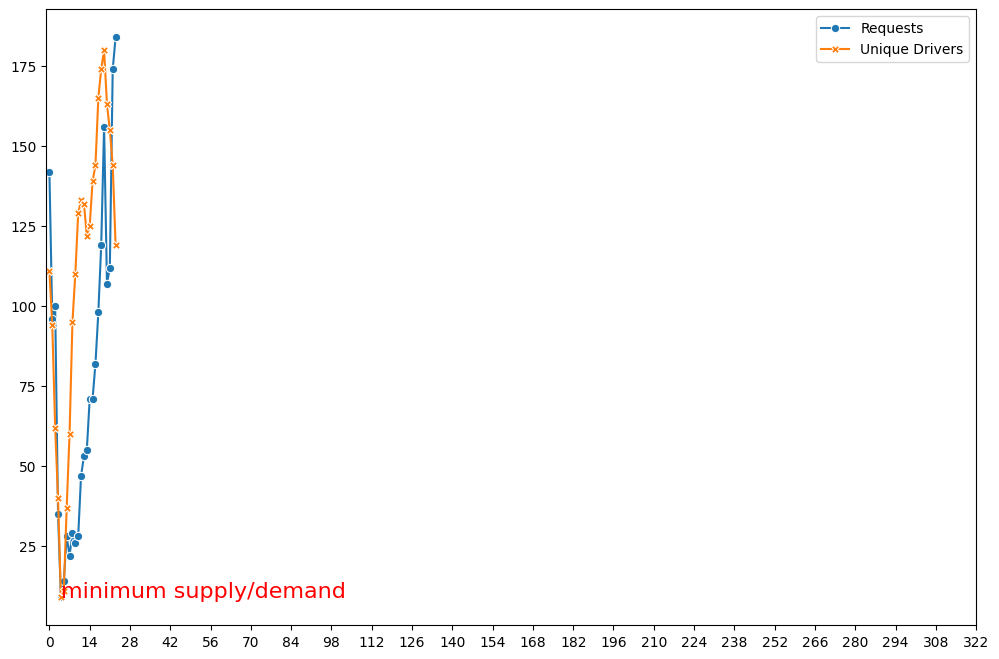

In [92]:
#Visualizing
df_agg_time = df.groupby('Time (Local)', as_index=False)[df.select_dtypes(include='number').columns].sum()

min_value_d = df_agg_time['Requests'][min_point[0]]
plt.figure(figsize=(12,8))
fig = sns.lineplot(data=df_agg_time[['Requests', 'Unique Drivers']], markers=True, dashes=False)
plt.xticks(df_agg_time['Time (Local)'])
plt.annotate('minimum supply/demand', xy=(min_point[0], min_value_d), color='r', fontsize=16)
plt.show()